In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
import json

In [3]:
with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<00V>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding="post")
print(padded[0])
print(padded.shape)


[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [6]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
training_sentences = sentences[0:training_size]
tokenizer.fit_on_texts(training_sentences)
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]



In [7]:


word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length,
                                padding=padding_type, truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,
                               padding=padding_type, truncating=trunc_type)

In [13]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [16]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - loss: 0.6616 - accuracy: 0.5896 - val_loss: 0.5708 - val_accuracy: 0.7994
Epoch 2/30
625/625 - 2s - loss: 0.4244 - accuracy: 0.8349 - val_loss: 0.3828 - val_accuracy: 0.8389
Epoch 3/30
625/625 - 2s - loss: 0.3094 - accuracy: 0.8785 - val_loss: 0.3520 - val_accuracy: 0.8517
Epoch 4/30
625/625 - 2s - loss: 0.2582 - accuracy: 0.8995 - val_loss: 0.3439 - val_accuracy: 0.8556
Epoch 5/30
625/625 - 2s - loss: 0.2220 - accuracy: 0.9136 - val_loss: 0.3442 - val_accuracy: 0.8566
Epoch 6/30
625/625 - 2s - loss: 0.1947 - accuracy: 0.9260 - val_loss: 0.3523 - val_accuracy: 0.8557
Epoch 7/30
625/625 - 2s - loss: 0.1718 - accuracy: 0.9362 - val_loss: 0.3709 - val_accuracy: 0.8515
Epoch 8/30
625/625 - 2s - loss: 0.1544 - accuracy: 0.9434 - val_loss: 0.3816 - val_accuracy: 0.8536
Epoch 9/30
625/625 - 2s - loss: 0.1397 - accuracy: 0.9502 - val_loss: 0.4182 - val_accuracy: 0.8433
Epoch 10/30
625/625 - 2s - loss: 0.1258 - accuracy: 0.9534 - val_loss: 0.4195 - val_accuracy: 0.8515

In [17]:
#checking the degree of accuracy
sentence = [
    "granny starting to fear spiders in the garden might be real",
    "the weather today is bright and sunny"
]

In [18]:
sequences = tokenizer.texts_to_sequences(sentence)

padded = pad_sequences(sequences, maxlen=max_length,
                      padding=padding_type,
                      truncating=trunc_type)

print(model.predict(padded))

[[9.9420321e-01]
 [3.4615127e-06]]


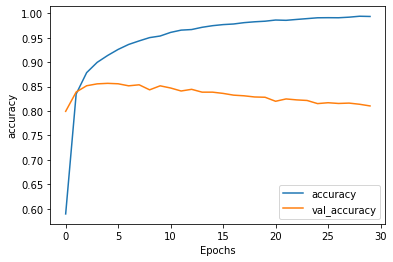

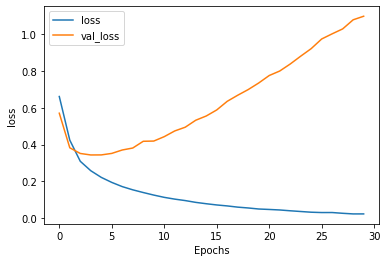

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")